In [1]:
import warnings
from pathlib import Path

import iris
import iris.cube
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from aeolus.model import um
from aeolus.synthobs import (
    calc_stellar_flux,
    calc_transmission_spectrum,
    calc_transmission_spectrum_day_night_average,
    read_normalized_stellar_flux,
    read_spectral_bands,
)

In [3]:
warnings.filterwarnings("ignore", module="iris")
plt.rcParams["mathtext.default"] = "regular"

In [4]:
# # Note that the file paths should be pathlib.Path-like objects, not just plain strings!
# METH_DATA_DIR = Path.home().parent.parent/ "data" / "mz355" / "um_runs" / "wasp96b" / "kinetics" / "u-cp238" / "raw" / "atmos_base_1001" 
# METH_DATA_DIR_eq = Path.home().parent.parent/ "data" / "mz355" / "um_runs" / "wasp96b" / "equilibrium" / "u-cp158" / "raw" / "atmos_base_1001" 

# #/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_1000

# SPECTRUM_DIR = Path.home().parent.parent/ "data" / "mz355" / "um_inputs" / "planets" /  "wasp96b" /  "spectral_files"

# spectral_file = SPECTRUM_DIR / "spec_file_wasp96b_mdh0_sw_500"
# meth_data_file = METH_DATA_DIR / "atmosa.ph0000001000_00_day_ch4"
# meth_pd0 = iris.load(meth_data_file)

# #2hr_mdh1_day/atmos_base_0000

# print(meth_pd0)
# meth_planet_transmission_day = meth_pd0.extract_cube("m01s01i755")


# # To keep the units of stellar and planetary parameters, store the parameters as iris cubes
# stellar_constant_at_1_au = iris.cube.Cube(
#     1275.359867, units="W m-2", long_name="stellar_constant_at_1_au"
# )
# stellar_radius = iris.cube.Cube(7.31e8, units="m", long_name="stellar_radius")
# planet_radius = iris.cube.Cube(83893200, units="m", long_name="planet_radius")
# planet_domain_height = iris.cube.Cube(9737675.52477816, units="m", long_name="height_domain")
# planet_top_of_atmosphere = planet_radius + planet_domain_height

# spectral_file = SPECTRUM_DIR / "spec_file_wasp96b_mdh0_sw_500"
# meth_data_file_eq = METH_DATA_DIR_eq / "atmosa.ph0000001000_00_day_ch4"
# meth_pd0_eq = iris.load(meth_data_file_eq)

# #2hr_mdh1_day/atmos_base_0000

# print(meth_pd0_eq)
# meth_planet_transmission_day_eq = meth_pd0_eq.extract_cube("m01s01i755")

# meth_rp_eff_over_rs = calc_transmission_spectrum(
#     meth_planet_transmission_day,
#     spectral_file,
#     stellar_constant_at_1_au,
#     stellar_radius,
#     planet_top_of_atmosphere,
#     model=um,
# )

# meth_rp_eff_over_rs_eq = calc_transmission_spectrum(
#     meth_planet_transmission_day_eq,
#     spectral_file,
#     stellar_constant_at_1_au,
#     stellar_radius,
#     planet_top_of_atmosphere,
#     model=um,
# )

# METH_NIGHT_DIR = Path.home().parent.parent/ "data" / "mz355" / "um_runs" / "wasp96b" / "kinetics" / "u-cp238" / "raw" / "atmos_base_1001" 
# meth_night_file = METH_NIGHT_DIR / "atmosa.ph0000001000_00_night_ch4"

# meth_night_cubes = iris.load(meth_night_file)

# #2hr_mdh1_day/atmos_base_0000

# meth_planet_transmission_night = meth_night_cubes.extract_cube("m01s01i755")

# METH_NIGHT_DIR_eq = Path.home().parent.parent/ "data" / "mz355" / "um_runs" / "wasp96b" / "equilibrium" / "u-cp158" / "raw" / "atmos_base_1001" 
# meth_night_file_eq = METH_NIGHT_DIR_eq / "atmosa.ph0000001000_00_night_ch4"

# meth_night_cubes_eq = iris.load(meth_night_file_eq)

# #2hr_mdh1_day/atmos_base_0000

# meth_planet_transmission_night_eq = meth_night_cubes_eq.extract_cube("m01s01i755")

# meth_rp_eff_over_rs_night = calc_transmission_spectrum(
#     meth_planet_transmission_night,
#     spectral_file,
#     stellar_constant_at_1_au,
#     stellar_radius,
#     planet_top_of_atmosphere,
#     model=um,
# )

# meth_rp_eff_over_rs_night_eq = calc_transmission_spectrum(
#     meth_planet_transmission_night_eq,
#     spectral_file,
#     stellar_constant_at_1_au,
#     stellar_radius,
#     planet_top_of_atmosphere,
#     model=um,
# )
# meth_rp_eff_over_rs_dn = calc_transmission_spectrum_day_night_average(
#     meth_planet_transmission_day,
#     meth_planet_transmission_night,
#     spectral_file,
#     stellar_constant_at_1_au,
#     stellar_radius,
#     planet_top_of_atmosphere,
#     model=um,
# )

# meth_rp_eff_over_rs_dn_eq = calc_transmission_spectrum_day_night_average(
#     meth_planet_transmission_day_eq,
#     meth_planet_transmission_night_eq,
#     spectral_file,
#     stellar_constant_at_1_au,
#     stellar_radius,
#     planet_top_of_atmosphere,
#     model=um,
# )



In [5]:
# Note that the file paths should be pathlib.Path-like objects, not just plain strings!
METH_DATA_DIR = Path.home().parent.parent/ "data" / "mz355" / "um_runs" / "wasp96b" / "kinetics" / "u-cp238" / "raw" / "atmos_base_1001" 
METH_DATA_DIR_eq = Path.home().parent.parent/ "data" / "mz355" / "um_runs" / "wasp96b" / "equilibrium" / "u-cp158" / "raw" / "atmos_base_1001" 

#/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_1000


In [6]:
SPECTRUM_DIR = Path.home().parent.parent/ "data" / "mz355" / "um_inputs" / "planets" /  "wasp96b" /  "spectral_files"

spectral_file = SPECTRUM_DIR / "spec_file_wasp96b_mdh0_sw_500"
meth_data_file = METH_DATA_DIR / "atmosa.ph0000001000_00_day_nh3"
meth_pd0 = iris.load(meth_data_file)

#2hr_mdh1_day/atmos_base_0000

print(meth_pd0)
meth_planet_transmission_day = meth_pd0.extract_cube("m01s01i755")


# To keep the units of stellar and planetary parameters, store the parameters as iris cubes
stellar_constant_at_1_au = iris.cube.Cube(
    1275.359867, units="W m-2", long_name="stellar_constant_at_1_au"
)
stellar_radius = iris.cube.Cube(7.31e8, units="m", long_name="stellar_radius")
planet_radius = iris.cube.Cube(83893200, units="m", long_name="planet_radius")
planet_domain_height = iris.cube.Cube(9737675.52477816, units="m", long_name="height_domain")
planet_top_of_atmosphere = planet_radius + planet_domain_height

0: m01s01i755 / (unknown)              (pseudo_level: 500; latitude: 90; longitude: 144)


In [7]:

spectral_file = SPECTRUM_DIR / "spec_file_wasp96b_mdh0_sw_500"
meth_data_file_eq = METH_DATA_DIR_eq / "atmosa.ph0000001000_00_day_nh3"
meth_pd0_eq = iris.load(meth_data_file_eq)

#2hr_mdh1_day/atmos_base_0000

print(meth_pd0_eq)
meth_planet_transmission_day_eq = meth_pd0_eq.extract_cube("m01s01i755")


# To keep the units of stellar and planetary parameters, store the parameters as iris cubes
stellar_constant_at_1_au = iris.cube.Cube(
    1275.359867, units="W m-2", long_name="stellar_constant_at_1_au"
)
stellar_radius = iris.cube.Cube(7.31e8, units="m", long_name="stellar_radius")
planet_radius = iris.cube.Cube(83893200, units="m", long_name="planet_radius")
planet_domain_height = iris.cube.Cube(9737675.52477816, units="m", long_name="height_domain")
planet_top_of_atmosphere = planet_radius + planet_domain_height

0: m01s01i755 / (unknown)              (pseudo_level: 500; latitude: 90; longitude: 144)


In [8]:
read_spectral_bands(spectral_file)[0:4]  # print the first four spectral bands


array([(1, 9.9999997e-05, 9.9999998e-03),
       (2, 4.9999999e-05, 9.9999997e-05),
       (3, 3.3333334e-05, 4.9999999e-05),
       (4, 2.4999999e-05, 3.3333334e-05)],
      dtype=[('spectral_band_index', '<u4'), ('lower_wavelength_limit', '<f4'), ('upper_wavelength_limit', '<f4')])

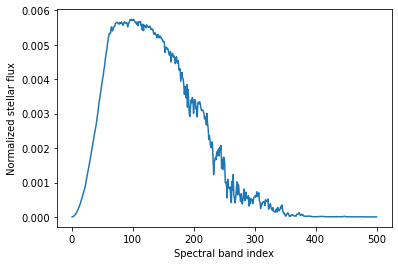

In [9]:
normalized_stellar_flux = read_normalized_stellar_flux(spectral_file)

plt.plot(
    normalized_stellar_flux.coord("spectral_band_index").points,
    normalized_stellar_flux.data,
)
plt.xlabel("Spectral band index")
plt.ylabel("Normalized stellar flux");

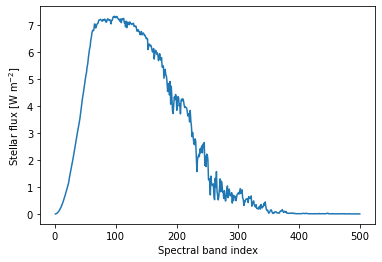

In [10]:
stellar_flux = calc_stellar_flux(spectral_file, stellar_constant_at_1_au)

plt.plot(stellar_flux.coord("spectral_band_index").points, stellar_flux.data)
plt.xlabel("Spectral band index")
plt.ylabel("Stellar flux [W $m^{-2}$]");

In [11]:
meth_planet_transmission_day.shape

(500, 90, 144)

In [12]:
meth_planet_transmission_day_eq.shape

(500, 90, 144)

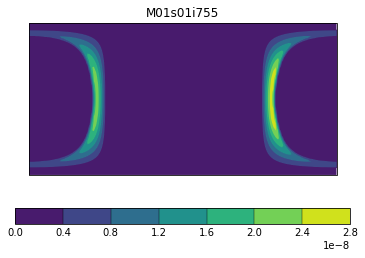

In [13]:

#spectrum_data_1time

#print(spectrum_data.shape)

qplt.contourf(meth_planet_transmission_day[2, ...]);

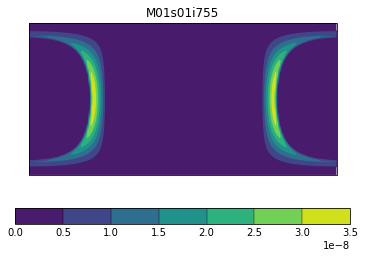

In [14]:
qplt.contourf(meth_planet_transmission_day_eq[2, ...]);

In [15]:
meth_rp_eff_over_rs = calc_transmission_spectrum(
    meth_planet_transmission_day,
    spectral_file,
    stellar_constant_at_1_au,
    stellar_radius,
    planet_top_of_atmosphere,
    model=um,
)



In [16]:
meth_rp_eff_over_rs_eq = calc_transmission_spectrum(
    meth_planet_transmission_day_eq,
    spectral_file,
    stellar_constant_at_1_au,
    stellar_radius,
    planet_top_of_atmosphere,
    model=um,
)

In [17]:
METH_NIGHT_DIR = Path.home().parent.parent/ "data" / "mz355" / "um_runs" / "wasp96b" / "kinetics" / "u-cp238" / "raw" / "atmos_base_1001" 
meth_night_file = METH_NIGHT_DIR / "atmosa.ph0000001000_00_night_nh3"

meth_night_cubes = iris.load(meth_night_file)

#2hr_mdh1_day/atmos_base_0000

meth_planet_transmission_night = meth_night_cubes.extract_cube("m01s01i755")



In [18]:
METH_NIGHT_DIR_eq = Path.home().parent.parent/ "data" / "mz355" / "um_runs" / "wasp96b" / "equilibrium" / "u-cp158" / "raw" / "atmos_base_1001" 
meth_night_file_eq = METH_NIGHT_DIR_eq / "atmosa.ph0000001000_00_night_nh3"

meth_night_cubes_eq = iris.load(meth_night_file_eq)

#2hr_mdh1_day/atmos_base_0000

meth_planet_transmission_night_eq = meth_night_cubes_eq.extract_cube("m01s01i755")

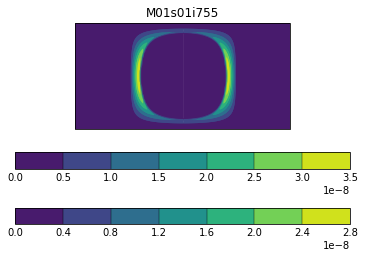

In [19]:

#spectrum_data_1time

#print(spectrum_data.shape)
qplt.contourf(meth_planet_transmission_night[2, ...]);
qplt.contourf(meth_planet_transmission_night_eq[2, ...]);

In [20]:
meth_rp_eff_over_rs_night = calc_transmission_spectrum(
    meth_planet_transmission_night,
    spectral_file,
    stellar_constant_at_1_au,
    stellar_radius,
    planet_top_of_atmosphere,
    model=um,
)

meth_rp_eff_over_rs_night_eq = calc_transmission_spectrum(
    meth_planet_transmission_night_eq,
    spectral_file,
    stellar_constant_at_1_au,
    stellar_radius,
    planet_top_of_atmosphere,
    model=um,
)


In [21]:
meth_rp_eff_over_rs_dn = calc_transmission_spectrum_day_night_average(
    meth_planet_transmission_day,
    meth_planet_transmission_night,
    spectral_file,
    stellar_constant_at_1_au,
    stellar_radius,
    planet_top_of_atmosphere,
    model=um,
)

meth_rp_eff_over_rs_dn_eq = calc_transmission_spectrum_day_night_average(
    meth_planet_transmission_day_eq,
    meth_planet_transmission_night_eq,
    spectral_file,
    stellar_constant_at_1_au,
    stellar_radius,
    planet_top_of_atmosphere,
    model=um,
)

In [22]:
data_dir_obs = Path.home()/ "WASP_data"
pltname = "Wasp96b_Trans_Data.pdf"

JWST = np.loadtxt(data_dir_obs / f"JWST_data.txt")
Nik = np.loadtxt(data_dir_obs / f"Nikolov_2022_data.txt")

#print(JWST)
#print(Nik)

#Slice JWST data into useable arrays
JWST_wavelengths = JWST[:,0] #Extract wavelength data
Err_JWST_wavelengths = JWST[:,1] #Extract uncertainty in wavelength data
JWST_R_p_over_R_s_sqr = JWST[:,2] # Extract R_p over R_s 
Err_JWST_R_p_over_R_s_sqr = JWST[:,3] # extract uncertainty in R_p over R_s

# Slice Nikolov data
Nik_wavelengths = Nik[:,0]
Err_Nik_wavelengths = Nik[:,1]
Nik_R_p_over_R_s = Nik[:,2]
Err_Nik_R_p_over_R_s = Nik[:,3]

Nik_R_p_over_R_s_sqr = []
Err_Nik_R_p_over_R_s_sqr = []

# Need to square the data in the 3/4 th columns
for i in range(len(Nik_R_p_over_R_s)):
    a = Nik_R_p_over_R_s[i]**2
    Nik_R_p_over_R_s_sqr.append(a)

#Nikolov dataset gives standard deviation of datapoints this is the error from there plots, then multply by 2 and the value of R_p_over_R_s for error propagation
for i in range(len(Err_Nik_R_p_over_R_s)):
    a = 2*Nik_R_p_over_R_s[i]*Err_Nik_R_p_over_R_s[i]
    Err_Nik_R_p_over_R_s_sqr.append(a)

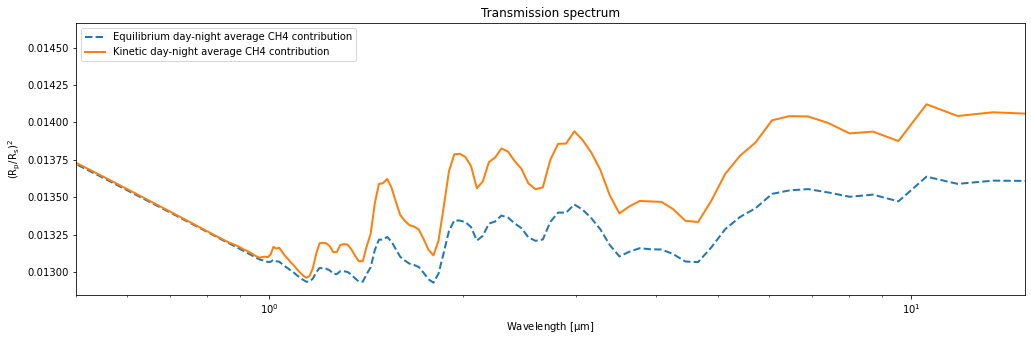

In [24]:
fig, ax = plt.subplots(figsize=(17, 5))
# axins = ax.inset_axes([0.7, 0.7, 0.25, 0.25])
# axins.set_xlim(5, 6)
# axins.set_ylim(0.0155, 0.0157)
ax.plot(
        meth_rp_eff_over_rs_dn_eq.coord("spectral_band_centres").points * 1e6,
        meth_rp_eff_over_rs_dn_eq.data**2-0.0012,
        label="Equilibrium day-night average CH4 contribution",
        linewidth=2,
        alpha=1,
        linestyle = "--"
        )
    # _ax.plot(
    #     rp_eff_over_rs_night.coord("spectral_band_centres").points * 1e6,
    #     rp_eff_over_rs_night.data**2,
    #     label="Nightside",
    #     linewidth=1,
    #     alpha=1,
    #     linestyle = "--"
    # )
ax.plot(
        meth_rp_eff_over_rs_dn.coord("spectral_band_centres").points * 1e6,
        meth_rp_eff_over_rs_dn.data**2-0.0012,
        label="Kinetic day-night average CH4 contribution",
        linewidth=2,
        alpha = 1
        
    )
# plt.scatter(JWST_wavelengths,JWST_R_p_over_R_s_sqr, color = 'r', label = "JWST data", alpha = 0.3)
# plt.errorbar(JWST_wavelengths,JWST_R_p_over_R_s_sqr,xerr = Err_JWST_wavelengths,yerr = Err_JWST_R_p_over_R_s_sqr, fmt = 'o', color = 'r', alpha = 0.3)
# # Plot Nikolov 2022 data with errorbars 
# plt.scatter(Nik_wavelengths,Nik_R_p_over_R_s_sqr, color = 'b',label = "Nikolov 2022 data", alpha = 0.3)
# plt.errorbar(Nik_wavelengths,Nik_R_p_over_R_s_sqr,xerr = Err_Nik_wavelengths,yerr = Err_Nik_R_p_over_R_s_sqr,fmt = 'o',color = 'b', alpha = 0.3)
# plt.xlabel("Wavelength [$\mu$m]")
# plt.ylabel("($R_p/R_s)^2$")
ax.set_title("Transmission spectrum")
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("($R_p/R_s)^2$")
ax.set_xscale("log")
ax.set_xlim(0.5, 15)

# xticks = np.concatenate(
#     [
#         np.arange(1, 11, 1),
#         np.arange(15, 35, 5),
#         np.arange(40, 120, 20),
#         np.arange(500, 1400, 500),
#         np.arange(10000, 10001, 500),
#     ]
# )
# ax.set_xticks(xticks)
# ax.set_xticklabels(xticks)
# ax.indicate_inset_zoom(axins, edgecolor="black")
ax.legend(loc="upper left")